# Importing modules

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from imblearn.over_sampling import ADASYN
import joblib
import numpy as np
import seaborn as sns

# Loading and Reading the dataset

In [2]:
# load data
data = pd.read_csv("dataset_to_score_finished.csv")

# Performing EDA on dataset

In [3]:
data.describe()

,rating,review_count,positive_reviews,neutral_reviews,negative_reviews,trustworthy_score
count,23577.000000,23577.000000,23577.000000,23577.000000,23577.000000,23577.000000
mean,4.314085,60.978750,58.780676,0.034313,2.163761,65.579496
std,0.623297,216.672365,210.074374,0.250825,8.466727,5.864837
min,1.000000,1.000000,0.000000,0.000000,0.000000,12.000000
25%,4.038462,5.000000,4.000000,0.000000,0.000000,62.222222
50%,4.461783,13.000000,13.000000,0.000000,0.000000,65.242424
75%,4.718182,42.000000,40.000000,0.000000,1.000000,68.766071
max,5.000000,10037.000000,9785.000000,8.000000,257.000000,100.000000


## Heat map

C:\Users\BIMSARA\AppData\Local\Temp\ipykernel_29388\2142008752.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation  = data.corr()


<Axes: >

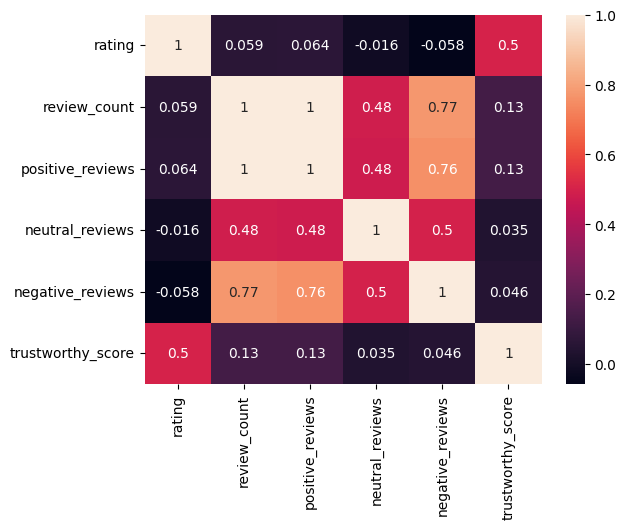

In [7]:
#Relationship analysis
corelation  = data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot = True)

## Pair plot

In [ ]:
sns.pairplot(data)

## Realtion plot

In [ ]:
sns.relplot(x= 'negative_reviews', y= 'rating', hue='trustworthy_score', data=data)

# Splitting data into features and target variable

In [3]:
# selecting features and target variable
X = data[["rating", "review_count", "positive_reviews", "neutral_reviews", "negative_reviews"]]
y = data["trustworthy_score"]

# Checking for outliers and removing them

In [4]:
#selecting columns to check for z-score
cols_to_check = ["rating", "positive_reviews", "neutral_reviews", "negative_reviews", "review_count"]

In [5]:
# Computing the z-scores for the selected columns in the dataset
z_scores = np.abs((data[cols_to_check] - data[cols_to_check].mean()) / data[cols_to_check].std())

In [6]:
# Identifying outliers as any data point with a z-score greater than 3
outliers = data[(z_scores > 3).any(axis=1)]

In [7]:
print(outliers)

             asin    rating  review_count  positive_reviews  neutral_reviews  \
1      073530498X  4.547619           126             124.0              1.0   
3       101635370  3.533333            30              24.0              1.0   
21     140053271X  4.266932           502             474.0              0.0   
24     1400699169  4.445455           110             109.0              1.0   
32     1418499765  1.800000            10               7.0              0.0   
...           ...       ...           ...               ...              ...   
23487  B0015EWMX8  4.468571          1400            1367.0              0.0   
23489  B0015EY5RE  3.825112           223             204.0              1.0   
23526  B0015HS1HQ  4.284916           358             356.0              1.0   
23542  B0015K903M  4.433022           321             298.0              1.0   
23570  B0015M22C6  4.531043          1659            1591.0              0.0   

       negative_reviews  trustworthy_sc

In [8]:
# Removing outliers from the dataset
data = data[(z_scores <= 3).all(axis=1)]

# Training the dataset

In [9]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# # Resample to balance classes
# adasyn = ADASYN()
# X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

## Using Random Forest Algorithm

In [11]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

# Evaluating the model

In [12]:
# Test model and get performance metrics
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R-squared: 0.35998928730181334
MSE: 22.868610887382182
RMSE: 4.78211364224881
MAE: 3.475386722112797


# Saving the model

In [ ]:
joblib.dump(rf_model, "rf_model.sav")

# Loading the model

In [ ]:
loaded_rf_model = joblib.load('rf_model.sav')

# Testing prediction for new features

In [106]:
new_features = [[5, 10, 10, 0, 0 ]] # example feature values
# new_trustworthy_score = mr_model.predict(new_features)
new_trustworthy_score = loaded_rf_model.predict(new_features)

C:\Users\BIMSARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [107]:
print("trustworthy score: ", int(round(new_trustworthy_score[0], 0))) 

trustworthy score:  69


In [108]:
final_trust_score = (((new_trustworthy_score - 34.7) * (100 - 0)) / (72 - 34.7)) + 0
trust_score = final_trust_score // 1 + 1
print("New Trustworthy Score: ", int(round(trust_score[0], 0)))

New Trustworthy Score:  92
